# Data Science Principles and Practices (COMM054) Lab Week 9

## Linear regression

**Note:** if you have not viewed the notebooks to accompany lectures 9-3 and 9-4, you should look at them before attempting this notebook.

In lectures, you saw how regression paramaters can be found numerically using gradient descent. However, for linear regression, we can actually solve for the minimising parameters *exactly*. Let's start with the case that we have one input random variable/feature $X$, and one output random variable $Y$, and a collection of $n$ corresponding samples $\{(x_1,y_1), (x_2,y_2),\ldots, (x_n,y_n)\}$.
We wish to find parameters $\theta_0$ and $\theta_1$ such that the line 

$$
y = \theta_0 + \theta_1 x
$$ 
best fits our data. We do so by minimising the **Mean Square Error** 

$$
E_\text{MSE}(\theta) = \frac{1}{n}\sum_{i=1}^n (y_i-(\theta_0 + \theta_1 x_i))^2
$$
as a function of $\theta_0, \theta_1$. To minimise, we calculate the gradient $\nabla_\theta E_\text{MSE}$, and setting it equal to $(0, 0)$, and solving for $\theta_0, \theta_1$. As before, we get

$$
\nabla_\theta E_\text{MSE} = \left( -\frac{2}{n}\sum_{i=1}^n (y_i-(\theta_0 + \theta_1 x_i)), -\frac{2}{n}\sum_{i=1}^n x_i(y_i-(\theta_0 + \theta_1 x_i)) \right) = (0,0)
$$
and so

$$
\sum_{i=1}^n(\theta_0 + \theta_1 x_i) = \sum_{i=1}^n y_i, \qquad \sum_{i=1}^n  x_i(\theta_0+\theta_1 x_i) = \sum_{i=1}^n x_i y_i.
$$
It is not too difficult to show that these equations can be solved simultaneously to give

$$
\theta_ 0 = \langle x \rangle - b\langle y\rangle, \qquad \theta_1 = \frac{\langle (x-\langle x\rangle)(y-\langle y\rangle)\rangle}{\langle (x-\langle x\rangle)^2\rangle} = \frac{\langle xy\rangle - \langle x\rangle \langle y\rangle}{\langle x^2\rangle - \langle x\rangle^2}
$$
where $\langle z\rangle := \frac{1}{n}\sum_{i=1}^n z_i$ (i.e., the sample mean of $z$).


The `scikit-learn.linear_model` has a built-in `LinearRegression` class that will perform these calculations automatically. Let's first import our packages.

In [1]:
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

As in the notebook accompanying Lecture 9-3, let's generate 100 samples from $Y = 4+3X + \epsilon$, and plot the result.

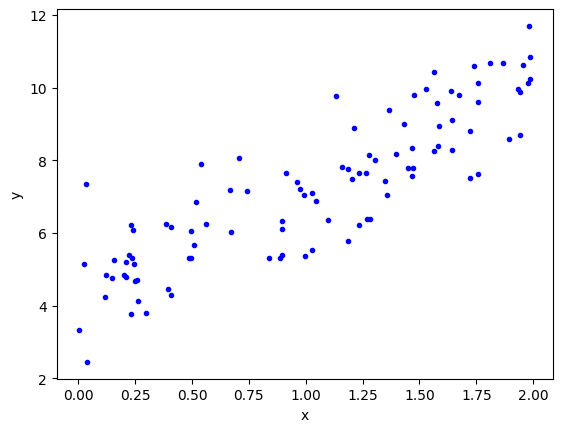

In [2]:
n = 100 # number of samples
x = np.random.uniform(low = 0, high = 2, size=n)  # generate n random x values in the interval [0,2]
y = 4 + 3*x + np.random.normal(loc=0, scale=1, size=n)

fig, ax  = plt.subplots(1, 1)

# plot data
ax.plot(x, y, '.b', markersize = 6)

# label axis
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

`lin_reg` is our object instance of the `LinearRegression` class, and we perform the linear regression by calling the `.fit()` method with some data. `fit()` expects its `x` data in the form of a $n\times k$ dimensional numpy array, where $k$ is the number of features. In this case $k=1$, and we use `np.newaxis` to add an additional dimension. $\theta_0$ will be stored in the `.intercept_` attribute, while all other parameters will be stored as a numpy array in the `.coef_` attribute.

See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html for further details.

In [3]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(x[:,np.newaxis], y)
theta = np.hstack((lin_reg.intercept_, lin_reg.coef_)) # combine theta values into one array
print(theta)
print("The minimising values of the parameters theta are ", theta)

[4.24580091 2.88896178]
The minimising values of the parameters theta are  [4.24580091 2.88896178]


You should compare these to the parameter values of 4 and 3 that we used to generate our data. You should not expect to exactly match these values, since the data is noisy, but they should hopefully be close.

Let's plot this best fit curve over our data.

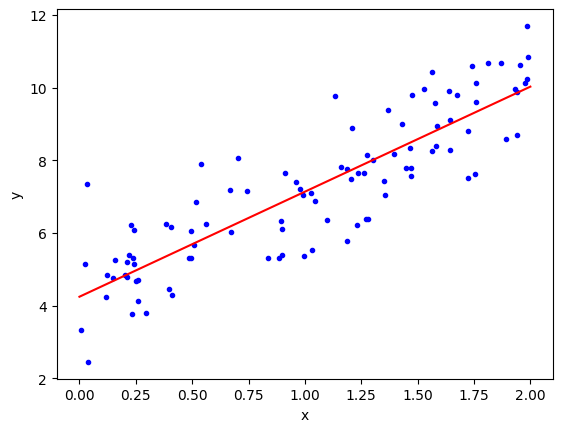

In [4]:
fig, ax  = plt.subplots(1, 1)

# plot data
ax.plot(x, y, '.b', markersize = 6)

# plot linear fit
xrange = np.linspace(0,2,100)
ax.plot(xrange, theta[0]+theta[1]*xrange, 'r')

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## Task 1
Implement gradient descent to numerically solve the for the minimum values instead. How do the values obtained compare to the exact minimum values obtained using `LinearRegression`? Can you find appropriate values of the learning rate and maximum interations to get close agreement?

Remember that the gradient is:

$$
\nabla_\theta E_\text{MSE} = \left( -\frac{2}{n}\sum_{i=1}^n (y_i-(\theta_0 + \theta_1 x_i)), -\frac{2}{n}\sum_{i=1}^n x_i(y_i-(\theta_0 + \theta_1 x_i)) \right)
$$

which can also be written as:

$$
\nabla_\theta E_\text{MSE} = -\frac{2}{n}(y-\theta X^T)X
$$

and the MSE is:

$$
MSE = \sum \frac{1}{n} (y-\theta X^T)^2
$$

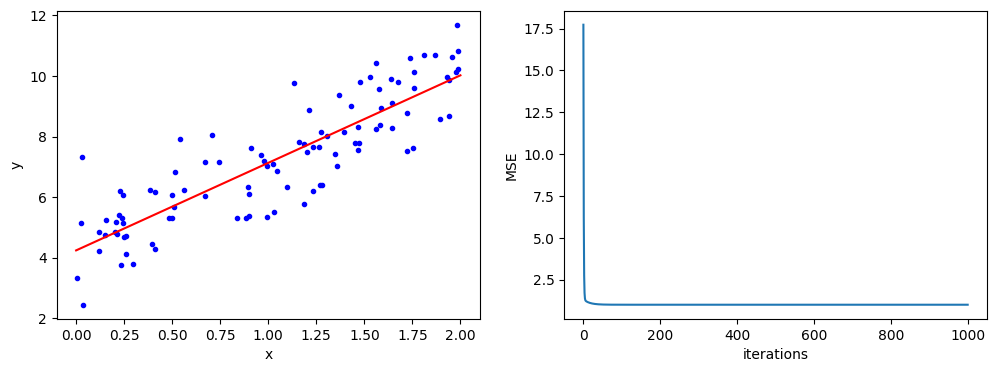

The minimum MSE is 1.0139768940898084
The theta parameter values are [4.24580091 2.88896178]


In [5]:
X = np.c_[np.ones((n,1)), x] # combine ones and sample values x in a matrix

def MSE(theta):
    return np.sum((y-theta.dot(X.T))**2)/n

def gradientMSE(theta):
    return -2/n*(y-theta.dot(X.T)).dot(X)

eta = 0.1  # learning rate
max_iterations = 1000

theta = np.zeros(2) # pick initial value of theta

MSE_values = np.zeros(max_iterations)

for i in range(max_iterations):
    theta = theta - eta*gradientMSE(theta)
    MSE_values[i] = MSE(theta)
    
fig, ax = plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(12)

# plot data
ax[0].plot(x, y, '.b', markersize = 6)

# plot linear fit
xrange = np.linspace(0,2,100)
ax[0].plot(xrange, theta[0]+theta[1]*xrange, 'r')

# label axes
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')

# plot MSE values
ax[1].plot(range(max_iterations), MSE_values)

# label axes
ax[1].set_xlabel('iterations')
ax[1].set_ylabel('MSE')

plt.show()

print("The minimum MSE is", MSE(theta))
print("The theta parameter values are", theta)

## Task 2
Carry out linear regression for two feature variables: first generate 100 samples for

$$
Y = 2 + 3X_1 + 2X_2 + \epsilon
$$

in the range $-1\le X_1,X_2\le 1$.

where $\epsilon\sim N(0,1)$. Then attempt use `LinearRegression` to fit a model

$$Y = \theta_0 + \theta_1X_1 + \theta_2 X_2$$

to the data. The values of $\theta_0, \theta_1, \theta_2$ you obtain should be close to 2, 3, 2.

*Hint*: assuming your samples are $\{(x_1^{(1)}, x_2^{(1)}, y^{(1)}), (x_1^{(2)}, x_2^{(2)}, y^{(2)}), \ldots, (x_1^{(n)}, x_2^{(n)}, y^{(n)})\}$, you should place your $x$ data in a matrix of the form

$$
\begin{pmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ \vdots \\ x_1^{(n)} & x_2^{(n)} \end{pmatrix}
$$

before passing it to the `fit()` method. You can accomplish this using `np.c_[x1,x2]`, for example, where `x1` are the first coordinates of the samples, and `x2` are the second coordinates.

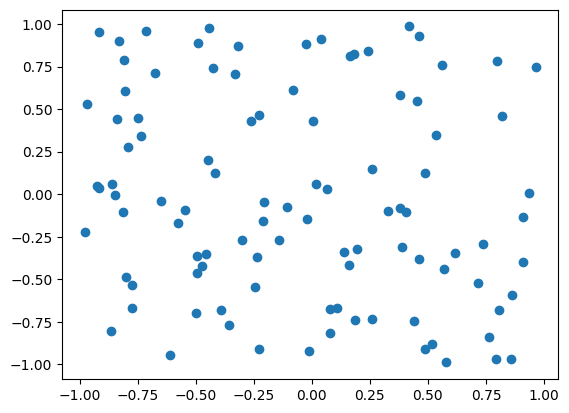

The values of the minimising parameters theta are [2.01211849 2.77916728 1.83066296]


In [6]:
lin_reg = linear_model.LinearRegression()

n = 100
x1 = np.random.uniform(low=-1, high=1, size=n)
x2 = np.random.uniform(low=-1, high=1, size=n)

# visualise the points chosen in [-1,1]x[-1,1]
plt.scatter(x1, x2)
plt.show()

y = 2 + 3*x1 + 2*x2 + np.random.normal(0,1, size=n)

X = np.c_[x1,x2]

lin_reg.fit(X,y)
theta = np.hstack((lin_reg.intercept_, lin_reg.coef_))
print("The values of the minimising parameters theta are", theta)

## Polynomial regression

As discussed in Lecture 9-4, polynomial regression instead attempts to fit a curve

$$
y=\theta_0 + \theta_1 x + \theta_2 x^2 + \ldots + \theta_k x^k
$$

to our data. Polynomial regression functions like linear regression with  𝑘  different features  $𝑥,𝑥^2,…,𝑥^𝑘$, and so can also be performed using the LinearRegression class. However, we must first combine all the features into a matrix  𝑋 . In Lecture 9-4 we used a custom function to do this, but scikit-learn comes with the class sklearn.preprocessing.PolynomialFeatures for the same purpose. The method fit_transform() is used to generate polynomial features, with or without the bias terms (which all equal the constant 1).

See https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html for details.

In [7]:
from sklearn.preprocessing import PolynomialFeatures

x = np.arange(4)[:,np.newaxis]
k = 3 # order of polynomial features

print("Original data:")
print(x)
print("Polynomial features with bias terms:")
print(PolynomialFeatures(degree=k).fit_transform(x))
print("Polynomial features without bias terms:")
print(PolynomialFeatures(degree=k, include_bias = False).fit_transform(x))

Original data:
[[0]
 [1]
 [2]
 [3]]
Polynomial features with bias terms:
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  3.  9. 27.]]
Polynomial features without bias terms:
[[ 0.  0.  0.]
 [ 1.  1.  1.]
 [ 2.  4.  8.]
 [ 3.  9. 27.]]


Let's first generate some data for $Y = 2 + X + 0.5X^2 + \epsilon$, as before.

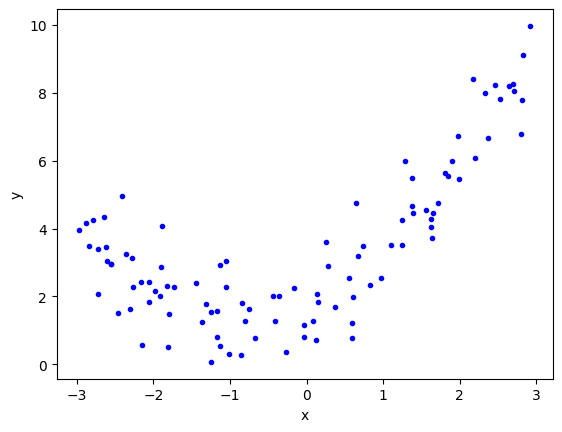

In [8]:
np.random.seed(42)

n = 100
x = np.random.uniform(low=-3, high=3, size=n)
y = 2 + x + 0.5 * x**2 + np.random.normal(loc=0, scale=1, size=n)

fig, ax  = plt.subplots(1, 1)
ax.plot(x, y, '.b', markersize = 6)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

We use our data `x` to construct a matrix of polynomial features `X`, and then feed this into the `.fit()` method of `LinearRegression`. Note `.fit()` expects the data without the bias term, but for later plotting we include the bias term, and simply slice the first column off when passing to `fit()`:

In [9]:
k = 2 # order of polynomial fit

X = PolynomialFeatures(degree=k).fit_transform(x[:,np.newaxis])

lin_reg.fit(X[:,1:], y)
theta = np.hstack((lin_reg.intercept_, lin_reg.coef_))
print("The minimising values of theta are", theta)

The minimising values of theta are [1.78134581 0.93366893 0.56456263]


We can of course plot the corresponding predicted curve against our data.

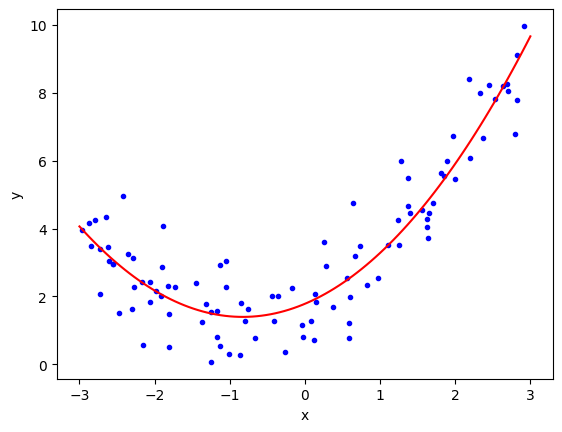

In [10]:
fig, ax  = plt.subplots(1, 1)
ax.plot(x, y, '.b', markersize = 6)

xrange = np.linspace(-3, 3, 100)
Xrange = PolynomialFeatures(degree=k).fit_transform(xrange[:,np.newaxis])

ax.plot(xrange, theta.dot(Xrange.T), 'r')

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

You should compare these values to the values 2, 1, 0.5 that were used to generate the data in the first place. Again, they should be close, but not exactly equal (due to the noise in the data).

## Task 3
Repeat this process with higher order polynomial fits, and observe the outcome. Does the polynomial appear to be overfitting the data?

The minimising values of theta are [ 1.59965542e+00  6.36805394e-01  7.07439963e-01  1.33278448e+00
  5.36762396e-01 -1.22458154e+00 -5.24951204e-01  4.51561907e-01
  1.80566877e-01 -7.92902400e-02 -2.82031367e-02  6.97328013e-03
  1.98826190e-03 -3.04611869e-04 -4.93591348e-05  6.10622933e-06]


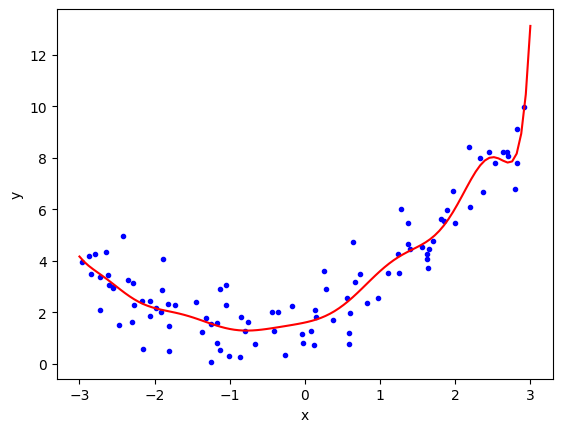

In [11]:
k = 15 # order of polynomial fit

X = PolynomialFeatures(degree=k).fit_transform(x[:,np.newaxis])

lin_reg.fit(X[:,1:], y)
theta = np.hstack((lin_reg.intercept_, lin_reg.coef_))
print("The minimising values of theta are", theta)

fig, ax  = plt.subplots(1, 1)
ax.plot(x, y, '.b', markersize = 6)

xrange = np.linspace(-3, 3, 100)
Xrange = PolynomialFeatures(degree=k).fit_transform(xrange[:,np.newaxis])

ax.plot(xrange, theta.dot(Xrange.T), 'r')

ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()